# Project: Investigate a Dataset (No-Show Appointment Dataset)

**Third project, data analysis nanodegree, Udacity.**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 


### Research Question 
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### Import statements

In [196]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import csv # read and write csv files
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [292]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#read data
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Note**: 
1. The names of the columns have some spelling errors.
2. The values of (Gender) and (No-show) are not boolean. 

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Note**: From these info we can notice that there are not any missing data that needed to be cleaned.

In [199]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Note**:
1. The minimmun age is -1 wich does not make any sense! 
2. The maximum Handicap value is 4 which is a mistake because this column is boolean, so its values must be either 0 or 1.

<a id='cleaning'></a>
## Data Cleaning 
In this section, I will do the following:
<ol>
<li><a href="#clean1">Rename columns names. </a></li>
<li><a href="#clean2">Convert (gender, no_show) values from string to boolean.</a></li>
<li><a href="#clean3">Remove the rows with negative ages.</a></li>
<li><a href="#clean4">Replace the positives values of handicap to 1.</a></li>
<li><a href="#clean5">Change the data format from string to datatime.</a></li>
<li><a href="#clean6">Find the outliers and ignore them.</a></li>
<li><a href="#clean7">Find number of waiting days.</a></li>
</ol>

<a id='clean1'></a>
#### 1. Rename columns names.

In [200]:
data.rename(columns = lambda x: x.lower(), inplace = True)
data.rename(columns = {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day',\
                    'appointmentday': 'appointment_day', 'neighbourhood':'neighborhood', 'hipertension': 'hypertension', 'handcap': 'handicap', \
                    'no-show': 'no_show'}, 
          inplace = True)

In [201]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='clean2'></a>
#### 2. Convert (gender, no_show) values from string to boolean.
This step wil be helpful while working because analyzing boolean is easier than string.

In [202]:
# Convert the values of the (Gender) to boolean values.
data['gender'].replace(['F'], 0, inplace = True)
data['gender'].replace(['M'], 1, inplace = True)
# Female = 0 , Male = 1

In [203]:
# Convert the values of the (No-show) to boolean values.
data['no_show'].replace(['Yes'], 1, inplace = True)
data['no_show'].replace(['No'], 0, inplace = True)
# No = 1 , Yes = 0

In [204]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='clean3'></a>
#### 3. Remove the rows with negative ages.

In [205]:
age_neg = data.query('age < 0')
age_neg

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,0,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,0


In [206]:
data = data.drop(data[data.age<0].index)
data['age'].min()

0

<a id='clean4'></a>
#### 4. Replace the positives values of handicap to 1.

In [207]:
handicap_error=data.query('handicap > 1')
handicap_error

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,7.282582e+13,5582483,1,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,0
1665,1.242919e+13,5525497,1,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,0
1666,1.242919e+13,5525498,1,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,0
2071,1.242919e+13,5640120,1,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,0
2091,1.491829e+13,5638626,0,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,0
2213,3.423831e+09,5640766,0,2016-04-29T11:22:50Z,2016-04-29T00:00:00Z,29,VILA RUBIM,0,0,0,0,2,0,0
2214,2.754718e+12,5640760,1,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,0
2673,4.415275e+13,5589893,1,2016-04-15T13:06:05Z,2016-04-29T00:00:00Z,17,SANTA TEREZA,0,0,0,0,2,1,0
5424,1.647280e+12,5647342,1,2016-05-02T13:24:36Z,2016-05-04T00:00:00Z,65,SANTO ANDRÉ,0,1,1,1,2,0,1
5467,4.555225e+12,5689883,0,2016-05-12T09:10:28Z,2016-05-16T00:00:00Z,10,BENTO FERREIRA,0,0,0,0,2,0,0


In [208]:
data['handicap'] = data['handicap'].replace([2,3,4],1)
data['handicap'].max()

1

<a id='clean5'></a>
#### 5. Change the data format from string to datatime.

In [209]:
data['scheduled_day'] = pd.to_datetime(data['scheduled_day'])
data['appointment_day'] = pd.to_datetime(data['appointment_day'])
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='clean6'></a>
#### 6. Find the outliers and ignore them.

In [210]:
#Explore the range of the age
unique_age = data['age'].unique()
print ("ages:", sorted(unique_age))

ages: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


Now we know that we have a range of ages from (0) to (115), to know the outliers we should know their frequencies.

Text(0.5, 1.0, 'Distribution of Age')

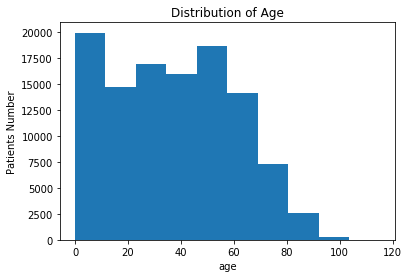

In [211]:
# Plotting Age distribution 
age_hist = data['age'].plot.hist(bins=10)
age_hist.set_xlabel("age")
age_hist.set_ylabel("Patients Number")
age_hist.set_title('Distribution of Age')


> We can notice that there are few values more than 90, which will be concidered as outliers. 

In [212]:
# Remove the outliers
data = data[(data.age <= 90)]

In [213]:
#Explore the range of the age
unique_age = data['age'].unique()
print ("Ages:", sorted(unique_age))

Ages: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


<a id='clean7'></a>
#### 7. Find number of waiting days.

In [214]:
# Calculate the difference between the appointment and scheduled day
data['waiting_time'] = data["appointment_day"] - data["scheduled_day"]
data['waiting_time'] = data["waiting_time"] / np.timedelta64(1, 'D')

data['waiting_time'].describe()

count    110218.000000
mean          9.709081
std          15.222062
min          -6.575926
25%          -0.346111
50%           3.476169
75%          14.319685
max         178.554873
Name: waiting_time, dtype: float64

In [215]:
# Remove negative values
data["waiting_time"] = data["waiting_time"].abs()

data['waiting_time'].describe()

count    110218.000000
mean         10.020171
std          15.019106
min           0.136343
25%           0.482781
50%           3.477211
75%          14.319685
max         178.554873
Name: waiting_time, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis 

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

To recognize what are the important factors I will explore the relationship between attendane (no-show column) and the following:
<ol>
<li><a href="#explore1">Calculate the relationship of attendance and gender.</a></li>
<li><a href="#explore2">Calculate the relationship of attendance and waiting time.</a></li>
<li><a href="#explore3">Calculate the relationship of attendance and age.</a></li>
<li><a href="#explore4">Calculate the relationship of attendance and neighborhood.</a></li>
<li><a href="#explore5">Calculate the relationship of attendance and disease.</a></li>
<li><a href="#explore6">Calculate the relationship of attendance and sms received.</a></li>
</ol>

In [251]:
# copy the data
data_copy= data.copy()

In [252]:
# Split the dataset to two different set based on (no_show) column
show_up = data_copy['no_show'] == 0
not_show_up = data_copy['no_show'] == 1

In [253]:
data_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.776481
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.672535
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.679907
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.728831
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.671794


<a id='explore1'></a>
### 1. Calculate the relationship of attendance and gender.

In [254]:
female_show = data_copy.query('gender==0')[show_up].count()['gender'] / data_copy.query('gender==0').count()['gender']
female_noshow = data_copy.query('gender==0')[not_show_up].count()['gender'] / data_copy.query('gender==0').count()['gender']
male_show = data_copy.query('gender==1')[show_up].count()['gender'] / data_copy.query('gender==1').count()['gender']
male_noshow = data_copy.query('gender==1')[not_show_up].count()['gender'] / data_copy.query('gender==1').count()['gender']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Percentage')

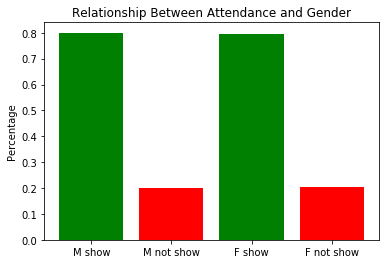

In [262]:
locations=[1,2,3,4]
heights=[male_show, male_noshow, female_show, female_noshow]
labels=['M show', 'M not show', 'F show', 'F not show']
plt.bar(locations, heights, tick_label=labels, color="GR")
plt.title('Relationship Between Attendance and Gender')
plt.ylabel('Percentage')

> The percentage of both females and males are almost same in both categories. 

<a id='explore2'></a>
### 2. Calculate the relationship of attendance and waiting time.

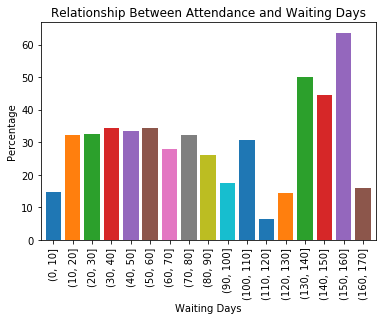

In [267]:
wait_bins = np.arange(0, 180, 10)

def percentage(value):
    return value.sum()/value.count()*100

wait_show = data_copy['no_show']
wait_show = wait_show.groupby(pd.cut(data_copy.waiting_time, wait_bins))
wait_show = wait_show.agg(percentage)
plt.subplots(figsize=(6,4))
plot = wait_show.plot.bar(title='Relationship Between Attendance and Waiting Days', width=0.8)
plot.set_xlabel('Waiting Days');
plot.set_ylabel('Percentage');


> We can notice that the most percentage of attendace of waiting is between 150 and 160 days. On other hand, the least percentage of attendance of waiting is between 110 and 120 days.

<a id='explore3'></a>
### 3. Calculate the relationship of attendance and age.

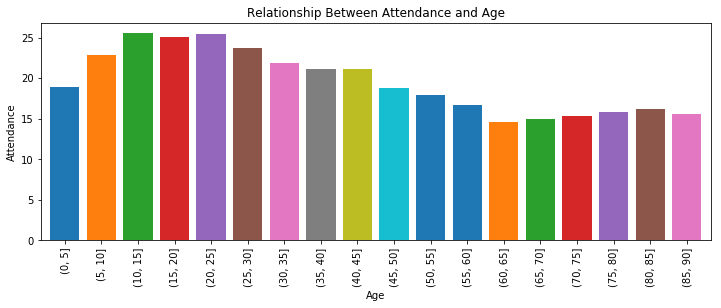

In [271]:
age_bins = np.arange(0, 91, 5)

def percentage(value):
    return value.sum()/value.count()*100

age_show = data_copy['no_show']
age_show = age_show.groupby(pd.cut(data_copy.age, age_bins))
age_show = age_show.agg(percentage)
plt.subplots(figsize=(12,4))


plot = age_show.plot.bar(title='Relationship Between Attendance and Age', width=0.8)
plot.set_xlabel('Age');
plot.set_ylabel('Attendance');


> We can notice that the best percentage for attendace is from 5 years to 45 years, where the attendance is betwen 20 and 25. Additionaly we can notice that percentage is getting decreased when age is increased.

<a id='explore4'></a>
### 4. Calculate the relationship of attendance and neighborhood.

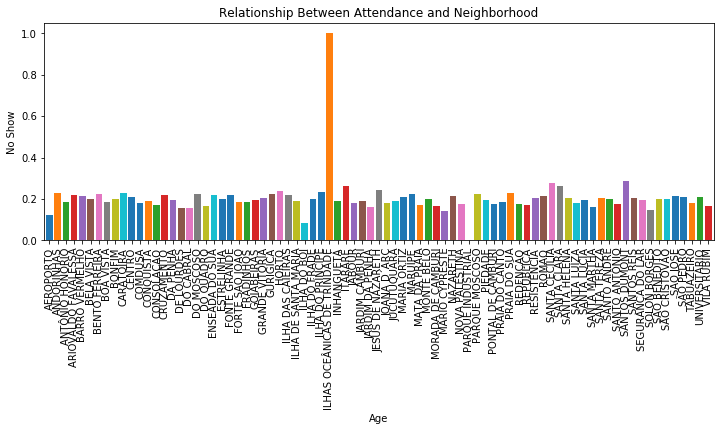

In [278]:
neighborhood_show = data_copy.groupby(['neighborhood'])['no_show'].sum()/data.groupby(['neighborhood'])['no_show'].count()

plt.subplots(figsize=(12,4))

plot = neighborhood_show.plot.bar(title='Relationship Between Attendance and Neighborhood', width=0.8)
plot.set_xlabel('Age');
plot.set_ylabel('No Show');

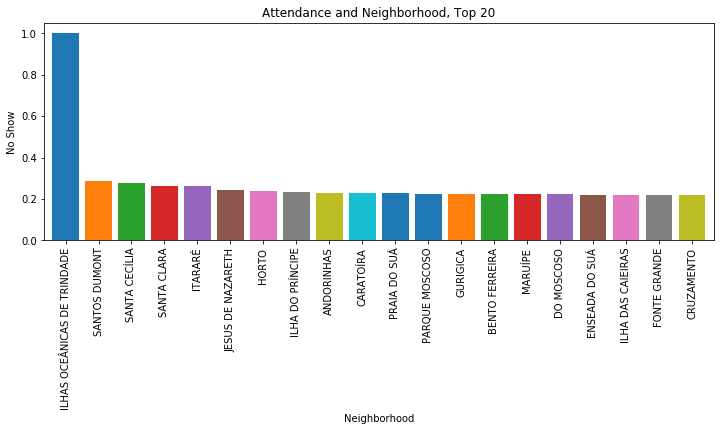

In [274]:
# Visualize the top 20 neighborhoods
neighborhood_show = neighborhood_show.nlargest(n = 20)

plt.subplots(figsize=(12,4))

plot = neighborhood_show.plot.bar(title='Attendance and Neighborhood, Top 20', width=0.8)
plot.set_xlabel('Neighborhood');
plot.set_ylabel('No Show');

> We can notice that the neighborhood that has the most attendance is (ILHAS OCEANNICAS DE TRINDADE), which has a very high number of attendenca comparing with other neighborhoods.

<a id='explore5'></a>
### 5. Calculate the relationship of attendance and diseases.

Text(0, 0.5, 'Percentage')

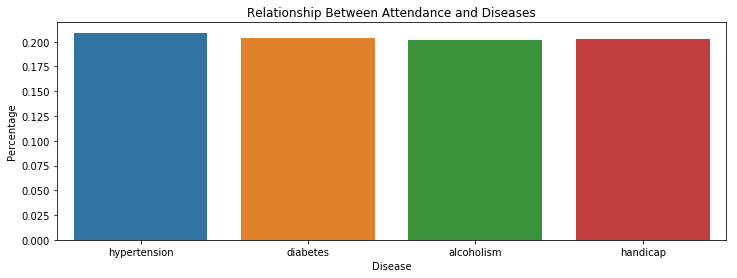

In [288]:
# Find out the relationship of the 4 kinds of disease and show up


hyp_show = data_copy.groupby(['hypertension'])['no_show'].sum() / data_copy.groupby(['hypertension'])['no_show'].count()
dia_show = data_copy.groupby(['diabetes'])['no_show'].sum() / data_copy.groupby(['diabetes'])['no_show'].count()
alc_show = data_copy.groupby(['alcoholism'])['no_show'].sum() / data_copy.groupby(['alcoholism'])['no_show'].count()
han_show = data_copy.groupby(['handicap'])['no_show'].sum() / data_copy.groupby(['handicap'])['no_show'].count()

x_diseases = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
y_diseases = [hyp_show.tolist()[0], dia_show.tolist()[0], \
              alc_show.tolist()[0], han_show.tolist()[0]]

plt.subplots(figsize=(12,4))
sns.barplot(x_diseases, y_diseases);
plt.title('Relationship Between Attendance and Diseases')
plt.xlabel('Disease')
plt.ylabel('Percentage')

> We can notice that the percentage of all diseases are almost same.

<a id='explore6'></a>
### 6. Calculate the relationship of attendance and sms_recieved.

Text(0, 0.5, 'Percentage')

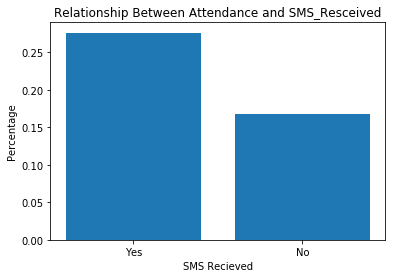

In [291]:
sms_count = data_copy.groupby(['sms_received','no_show']).count()['age']

sms_show = sms_count[1,1] / data_copy['sms_received'].value_counts()[1]
sms_noshow = sms_count[0,1] / data_copy['sms_received'].value_counts()[0]

plt.bar([1,2], [sms_show, sms_noshow], width=0.8)

plt.title('Relationship Between Attendance and SMS_Resceived')
plt.xticks([1,2],['Yes','No'])
plt.xlabel('SMS Recieved')
plt.ylabel('Percentage')

> We can notice that the percentage of people who received SMS messages is higher than those who didn't receive.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

After analyzing the data to know the important factors which affect patient attendance, I can conclude with these points:
1. **Gender:** The percentage of both females and males are almost same in both categories. So there is no clear relationship between attendance and gender.
2. **Waiting days:** We can notice that the most percentage of attendace of waiting is between 150 and 160 days. On other hand, the least percentage of attendance of waiting is between 110 and 120 days. So, there is no clear relationship between attendance and waiting days.
3. **Age:** We can notice that the best percentage for attendace is from 5 years to 45 years, where the attendance is betwen 20 and 25. Additionaly we can notice that percentage is getting decreased when age is increased. So we can say that the relationship between attendance and age is (inverse relationship).
4. **Neighborhood:** We can notice that the neighborhood that has the most attendance is (ILHAS OCEANNICAS DE TRINDADE), which has a very high number of attendenca comparing with other neighborhoods. So, there is a relationship, and I thinks if we have more info about how close these neighbohoods from the hospital, we can have more findings.
5. **Diseases:** We can notice that the percentage of all diseases are almost same. So, we can say that there is no clear relationship between attendance and diseases.
6. **SMS_Recieved** We can notice that the percentage of people who received SMS messages is higher than those who didn't receive. So, there is a good relationship between them.